### 경사 하강법
- 앞서 살펴본 오차 계산법을 통하면 오차를 구할 수 있다.
- 최적의 기울기 보다 기울기가 크거나 작으면 오차는 커진다.
- 최적의 y절편 보다 y절편이 크거나 작으면 오차는 커진다.
- 이에 오차와 기울기, 오차와 y절편간의 관계는 2차함수 관계가 된다.
- 이를 이용해 2함수를 통한 오차 그래프를 만들고 그래프의 접선의 기울기 구해 접선의 기울기가 최소가 되는 지점을 찾게 된다.
- 이 때 접선의 기울기를 구하기 위해 미분을 사용한다.
![경사 하강법](notebook_image/4.png)

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 학습할 데이터
공부한시간 = [2, 4, 6, 8]
성적 = [81, 93, 91, 97]

In [3]:
# 계산의 편리성을 위해 ndarray를 생성한다.
x_data = np.array(공부한시간)
y_data = np.array(성적)

print(x_data)
print(y_data)

[2 4 6 8]
[81 93 91 97]


In [4]:
# 임의의 기울기와 절편
기울기 = 0
절편 = 0

In [5]:
# 학습률 정하기
lr = 0.03

In [6]:
# 학습 횟수
epochs = 5000

In [7]:
# 학습한다.
# 학습 횟수 만큼 반복한다.
for i in range(epochs) :
    # 현재의 기울기와 절편을 이용해 예측 결과를 가져온다.
    y_pred = 기울기 * x_data + 절편
    # print(y_pred)
    # 오차를 구한다.
    error = y_data - y_pred
    # print(error)
    
    # 오차함수를 기울기로 미분한 값
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # 오참함수를 절편으로 미분한 값
    b_diff = -(2 / len(x_data)) * sum(error)
    
    # print(a_diff)
    # print(b_diff)
    
    # 학습률을 곱해 기존의 가중치와 절편을 업데이트 한다.
    기울기 = 기울기 - (lr * a_diff)
    절편 = 절편 - (lr * b_diff)
    
    # print(기울기)
    # print(절편)
    # 100회 마다 한번씩 출력한다.
    if i % 100 == 0 :
        print(f'epoch : {i}, 기울기 : {기울기}, 절편 : {절편}')

epoch : 0, 기울기 : 27.84, 절편 : 5.43
epoch : 100, 기울기 : 7.073858435872394, 절편 : 50.51166161138297
epoch : 200, 기울기 : 4.095999380762421, 절편 : 68.28224379060177
epoch : 300, 기울기 : 2.9756829100119027, 절편 : 74.96781336233505
epoch : 400, 기울기 : 2.5542024233262106, 절편 : 77.48302865233052
epoch : 500, 기울기 : 2.3956349066513707, 절편 : 78.42929177728175
epoch : 600, 기울기 : 2.3359793398132864, 절편 : 78.78529068727728
epoch : 700, 기울기 : 2.313535987420573, 절편 : 78.91922301600925
epoch : 800, 기울기 : 2.3050924490666174, 절편 : 78.96961044185792
epoch : 900, 기울기 : 2.3019158585694823, 절편 : 78.98856697541248
epoch : 1000, 기울기 : 2.3007207758016315, 절편 : 78.99569871827002
epoch : 1100, 기울기 : 2.300271167070735, 절편 : 78.99838179089187
epoch : 1200, 기울기 : 2.3001020172709508, 절편 : 78.9993912045567
epoch : 1300, 기울기 : 2.300038380484562, 절편 : 78.99977096168232
epoch : 1400, 기울기 : 2.3000144393354365, 절편 : 78.9999138322214
epoch : 1500, 기울기 : 2.3000054323026444, 절편 : 78.99996758234106
epoch : 1600, 기울기 : 2.300002043716771

In [8]:
# 발견한 기울기와 절편으로 예측 결과를 추출한다.
y_pred = 기울기 * x_data + 절편
y_pred

array([83.6, 88.2, 92.8, 97.4])

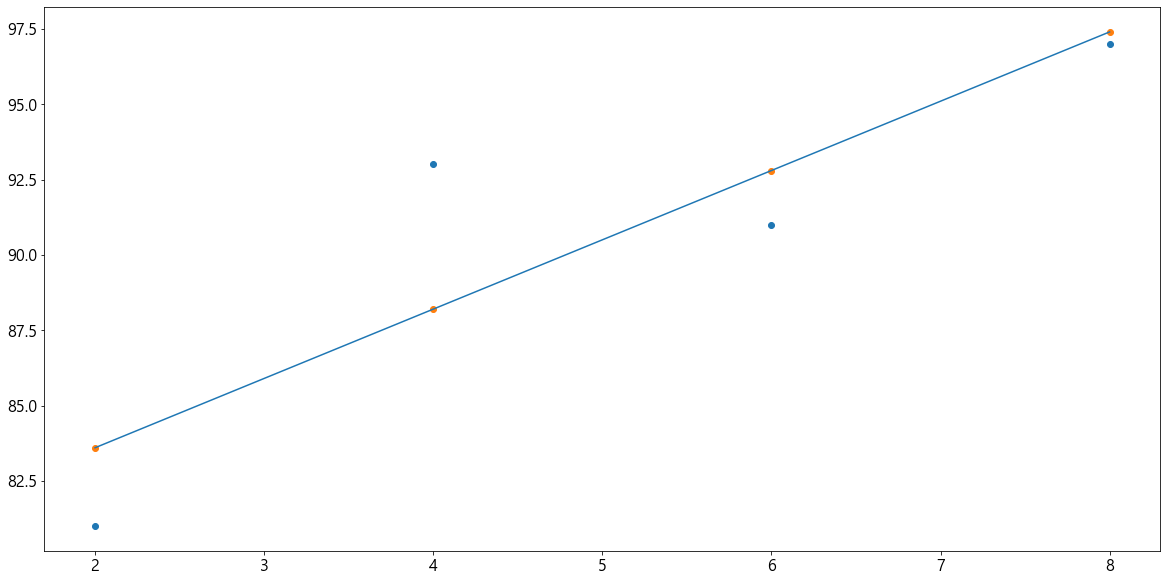

In [10]:
plt.scatter(공부한시간, 성적, label='original')
plt.scatter(공부한시간, y_pred, label='prediction')
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()